In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import LocalOutlierFactor
!pip install missingno
import missingno as msno;
from sklearn.preprocessing import LabelEncoder;

In [2]:
data = pd.read_csv("car_price.csv",encoding='ISO-8859-1',usecols = [2,4,5,7,8,9])
data.head()

,car_prices_in_rupee,fuel_type,transmission,manufacture,engine,Seats
0,10.03 Lakh,Diesel,Manual,2017,1956 cc,5 Seats
1,12.83 Lakh,Petrol,Automatic,2021,1330 cc,5 Seats
2,16.40 Lakh,Petrol,Automatic,2016,2494 cc,5 Seats
3,7.77 Lakh,Petrol,Automatic,2018,1199 cc,5 Seats
4,5.15 Lakh,Petrol,Manual,2016,1199 cc,5 Seats


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_prices_in_rupee  5512 non-null   object
 1   fuel_type            5512 non-null   object
 2   transmission         5512 non-null   object
 3   manufacture          5512 non-null   int64 
 4   engine               5512 non-null   object
 5   Seats                5512 non-null   object
dtypes: int64(1), object(5)
memory usage: 258.5+ KB


In [4]:
split_str = data["car_prices_in_rupee"].str.split().str.get(-2)
data["car_prices_in_rupee"] = np.array(split_str, dtype = "float")

In [5]:
# Convert to usd currency 
data["car_prices_in_rupee"] = np.array(data["car_prices_in_rupee"]*1230.24)
data.rename(columns ={"car_prices_in_rupee":'price_usd'},inplace=True)

In [6]:
# Processing of convert with dependent variable to numeric
split_str = data["engine"].str.split().str.get(0)
data["engine"] = np.array(split_str, dtype = "float64")

In [7]:
data.columns

Index(['price_usd', 'fuel_type', 'transmission', 'manufacture', 'engine',
       'Seats'],
      dtype='object')

In [8]:
dummy_variable = pd.get_dummies(data[['fuel_type','transmission','engine']])
dummy_variable.head()

,engine,fuel_type_Cng,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual
0,1956.0,0,1,0,0,0,0,1
1,1330.0,0,0,0,0,1,1,0
2,2494.0,0,0,0,0,1,1,0
3,1199.0,0,0,0,0,1,1,0
4,1199.0,0,0,0,0,1,0,1


In [9]:
y = data["price_usd"]

In [10]:
x = data.drop(["price_usd",'fuel_type','transmission','Seats'], axis = 1).astype("float64")
x.head()

,manufacture,engine
0,2017.0,1956.0
1,2021.0,1330.0
2,2016.0,2494.0
3,2018.0,1199.0
4,2016.0,1199.0


In [11]:
data = pd.concat([y, x, dummy_variable[['fuel_type_Cng', 'fuel_type_Diesel', 'fuel_type_Electric',
                                     'fuel_type_Lpg', 'fuel_type_Petrol', 'transmission_Automatic',
                                     'transmission_Manual', ]]],axis = 1)
data.head()

,price_usd,manufacture,engine,fuel_type_Cng,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual
0,12339.3072,2017.0,1956.0,0,1,0,0,0,0,1
1,15783.9792,2021.0,1330.0,0,0,0,0,1,1,0
2,20175.9360,2016.0,2494.0,0,0,0,0,1,1,0
3,9558.9648,2018.0,1199.0,0,0,0,0,1,1,0
4,6335.7360,2016.0,1199.0,0,0,0,0,1,0,1


In [12]:
dummy_variable.columns

Index(['engine', 'fuel_type_Cng', 'fuel_type_Diesel', 'fuel_type_Electric',
       'fuel_type_Lpg', 'fuel_type_Petrol', 'transmission_Automatic',
       'transmission_Manual'],
      dtype='object')

### _Handling with Dataset_

<AxesSubplot:>

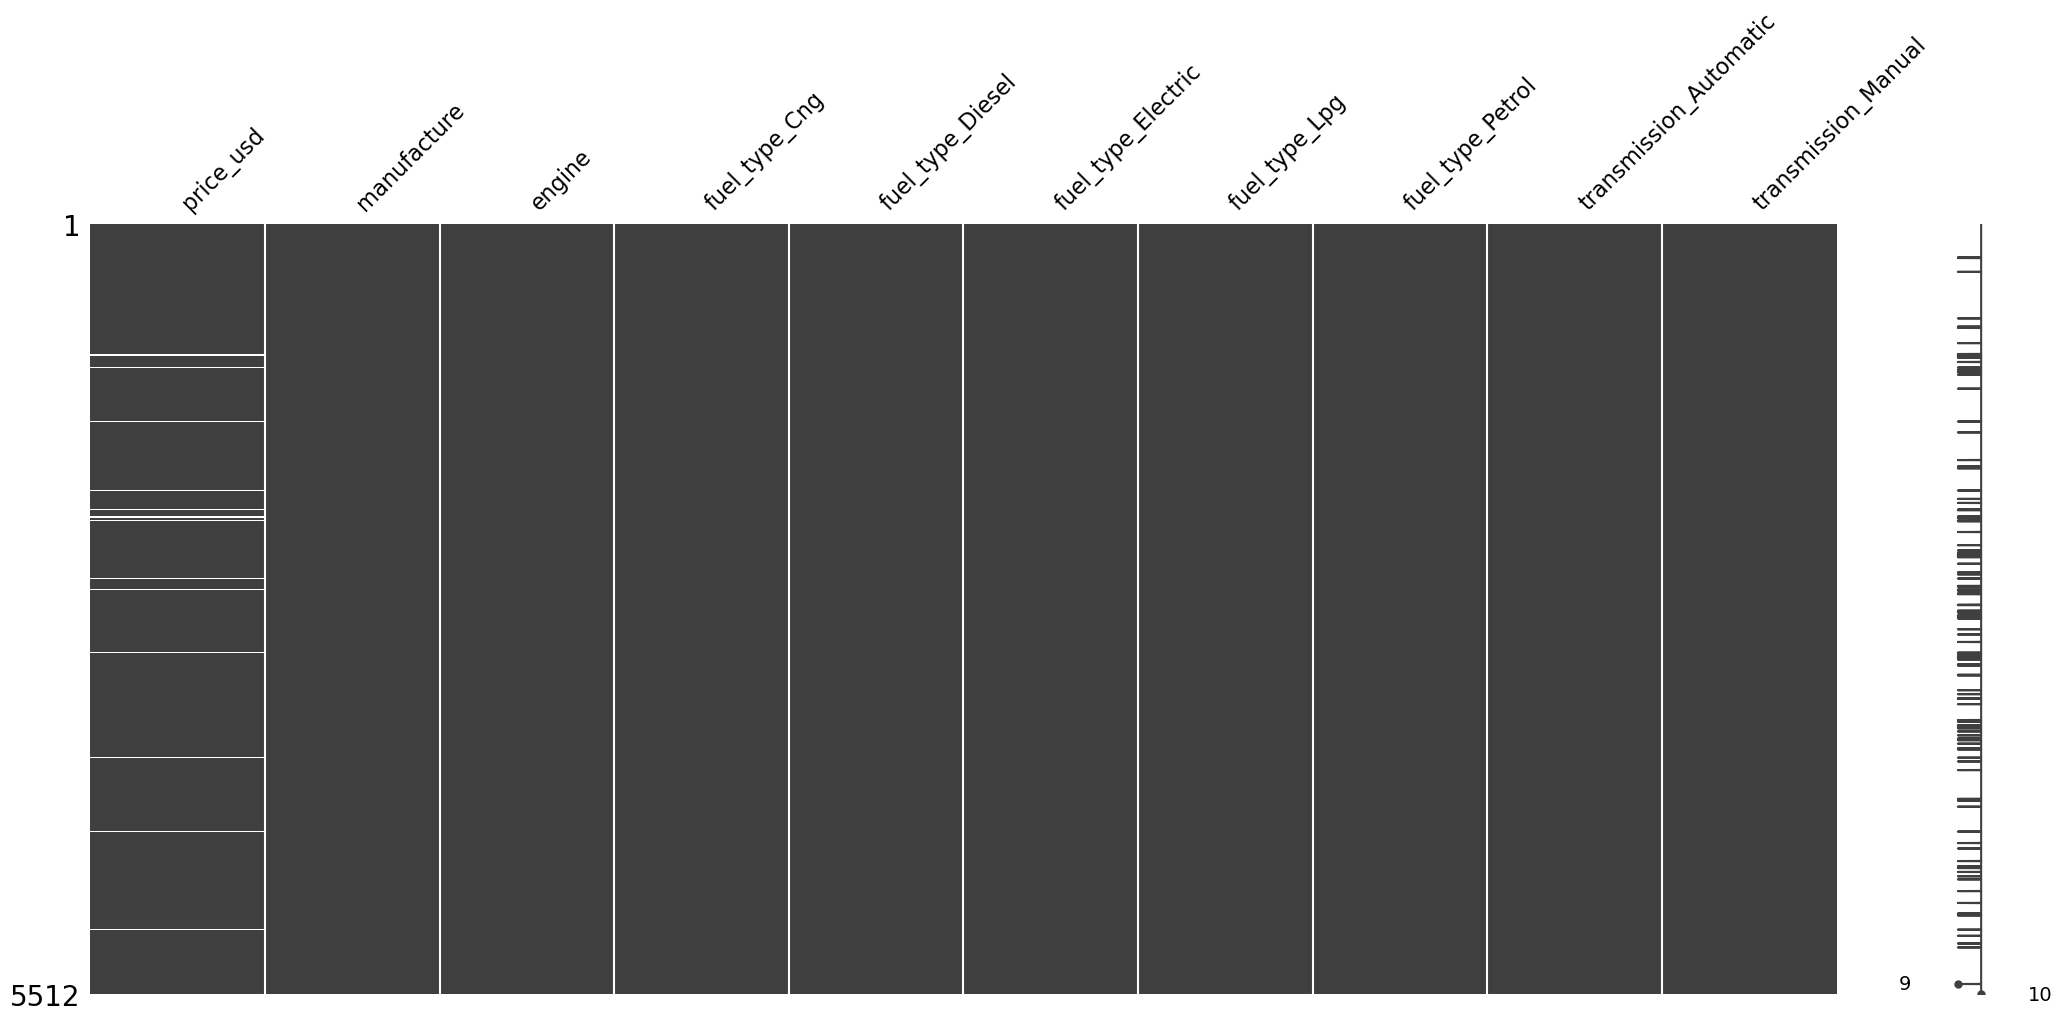

In [13]:
msno.matrix(data)

In [14]:
# To remove columns have missed values
data = data.dropna(axis = 'rows', how = 'any')

In [15]:
# Removing to outliers values with quartile method
Q1 = data["price_usd"].quantile(0.25)
Q3 = data["price_usd"].quantile(0.75)
IQR = Q3 - Q1

lower_limit  = Q1 - 1.5*IQR
upper_limit  = Q3 + 1.5*IQR

data3 = data[~((data["price_usd"] < lower_limit ) | (data["price_usd"] > upper_limit))]

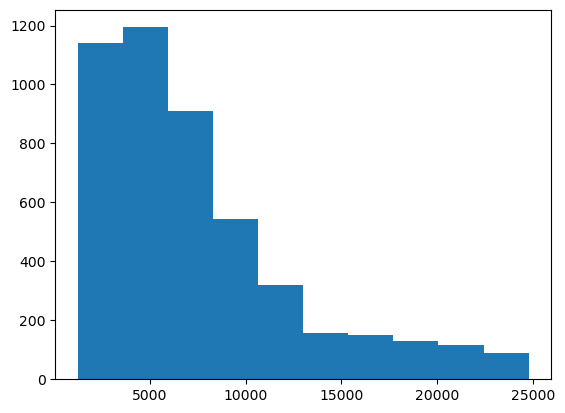

In [16]:
plt.hist(data3["price_usd"],);

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5389 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price_usd               5389 non-null   float64
 1   manufacture             5389 non-null   float64
 2   engine                  5389 non-null   float64
 3   fuel_type_Cng           5389 non-null   uint8  
 4   fuel_type_Diesel        5389 non-null   uint8  
 5   fuel_type_Electric      5389 non-null   uint8  
 6   fuel_type_Lpg           5389 non-null   uint8  
 7   fuel_type_Petrol        5389 non-null   uint8  
 8   transmission_Automatic  5389 non-null   uint8  
 9   transmission_Manual     5389 non-null   uint8  
dtypes: float64(3), uint8(7)
memory usage: 205.2 KB


In [18]:
y

0       12339.3072
1       15783.9792
2       20175.9360
3        9558.9648
4        6335.7360
           ...    
5507    35553.9360
5508    79842.5760
5509    16915.8000
5510    36784.1760
5511    39244.6560
Name: price_usd, Length: 5512, dtype: float64

### _Multilinear Model_

In [19]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [20]:
x = data.drop("price_usd", axis = 1)
y = data["price_usd"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 112)

In [22]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [23]:
model.intercept_

-2517951.496967527

In [24]:
model.coef_

array([ 1.25471664e+03,  1.73708227e+00,  3.48249715e+02,  6.25233191e+03,
       -1.23032957e+04,  4.80298800e+03,  8.99726047e+02,  9.63836755e+03,
       -9.63836755e+03])

In [25]:
model.predict(x_test)

array([ 6603.70565543, 18810.08004928, 10960.74386188, ...,
         884.25171041,  8999.25425971, 10250.496733  ])

In [26]:
model.score(x_train, y_train)

0.4590882179626534

In [27]:
# 10 folded, cross validation score for multilinear regression
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv = 10, scoring = "r2").mean()

0.4568278421720612

In [28]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
print(rmse)

12582.964072531197


In [29]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
print(rmse)

11961.708855173863


### _eXtreme Gradient Boosting - XGBoost_

In [31]:
!pip install xgboost
import xgboost as xgb

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [33]:
DM_train = xgb.DMatrix(data = x_train, label = y_train) # label - dependent variable
DM_test = xgb.DMatrix(data = x_test, label = y_test)

In [34]:
x_train.columns

Index(['manufacture', 'engine', 'fuel_type_Cng', 'fuel_type_Diesel',
       'fuel_type_Electric', 'fuel_type_Lpg', 'fuel_type_Petrol',
       'transmission_Automatic', 'transmission_Manual'],
      dtype='object')

In [35]:
from xgboost import XGBRegressor

In [36]:
xgb_model = XGBRegressor().fit(x_train, y_train)

In [37]:
y_predict = xgb_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_predict))

12046.444381326499

In [38]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [39]:
xgb_params = {"colsample_bytree": [0.2, 0.4, 0.5, 0.6, 0.9],
              "n_estimators": [50, 100, 200, 500],
              "max_depth": [2, 3, 4, 5, 6, 8],
              "learning_rate": [0.01, 0.02, 0.3, 0.5, 0.7]}

In [40]:
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV

In [41]:
xgb = XGBRegressor()
xgb_model_cv = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None

In [49]:
xgb_model_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.02,
 'max_depth': 5,
 'n_estimators': 200}

In [50]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6, learning_rate = 0.02,
                         max_depth = 5, n_estimators = 200)

In [51]:
xgb_tuned = xgb_tuned.fit(x_train, y_train)

In [52]:
y_predict = xgb_tuned.predict(x_test)

In [53]:
np.sqrt(mean_squared_error(y_test, y_predict))

10871.154264768908

In [54]:
r2_score(y_test, y_predict)

0.5489668141895447

### _Light GBM_

In [55]:
!pip install lightgbm
from lightgbm import LGBMRegressor

In [56]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(x_train, y_train)

In [57]:
np.sqrt(mean_squared_error(y_test, y_predict))

10871.154264768908

In [58]:
lgbm_params = {"colsample_bytree": [0.4, 0.5, 0.6, 0.9, 1],
               "n_estimators": [20, 40, 100, 200, 500, 1000],
               "max_depth": [1, 2, 3, 4, 5, 6, 7, 8,],
               "learning_rate": [0.1, 0.01, 0.5, 1]}

lgbm = LGBMRegressor()
lgbm_model_cv = GridSearchCV(lgbm, lgbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [59]:
lgbm_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [60]:
lgbm_model_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 500}

In [61]:
lgbm_tuned = LGBMRegressor(colsample_bytree = 0.5, learning_rate = 0.1,
                           max_depth = 5, n_estimators = 500)

In [62]:
lgbm_tuned = lgbm_tuned.fit(x_train, y_train)

In [63]:
y_predict = lgbm_tuned.predict(x_test)

In [64]:
np.sqrt(mean_squared_error(y_test, y_predict))

11013.407087999567

In [65]:
r2_score(y_test, y_predict)

0.5370857341732886